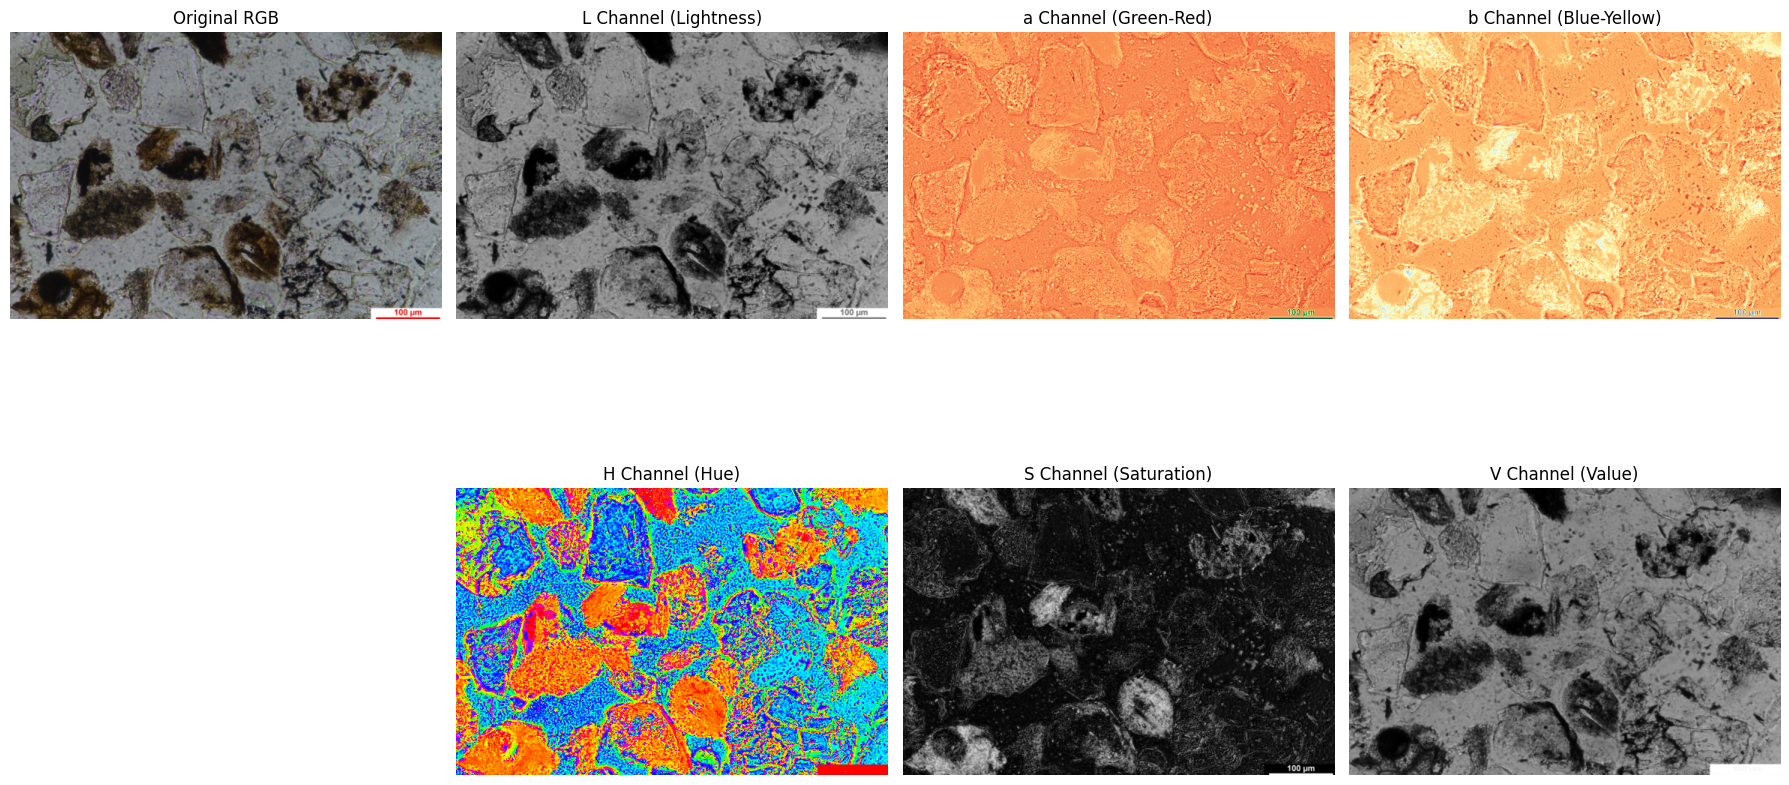

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像并转换颜色空间
img_bgr = cv2.imread(r'G:\wyj_big_project\H_\VRP-SAM-main\dataset\ROCK\PPL-temp\a30_6.png')  # 替换为您的图像路径
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# 提取LAB通道
L, a, b = cv2.split(img_lab)

# 提取HSV通道
H, S, V = cv2.split(img_hsv)

# 可视化设置
plt.figure(figsize=(18, 10))

# 显示原始RGB图像
plt.subplot(2, 4, 1)
plt.imshow(img_rgb)
plt.title('Original RGB')
plt.axis('off')

# 显示LAB通道
plt.subplot(2, 4, 2)
plt.imshow(L, cmap='gray')
plt.title('L Channel (Lightness)')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(a, cmap='RdYlGn')  # 使用红-黄-绿色彩映射增强对比
plt.title('a Channel (Green-Red)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(b, cmap='RdYlBu')  # 使用红-黄-蓝色彩映射增强对比
plt.title('b Channel (Blue-Yellow)')
plt.axis('off')

# 显示HSV通道
plt.subplot(2, 4, 6)
plt.imshow(H, cmap='hsv')  # 使用HSV循环色相映射
plt.title('H Channel (Hue)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(S, cmap='gray')
plt.title('S Channel (Saturation)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(V, cmap='gray')
plt.title('V Channel (Value)')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

def visualize_green_red_effect(image_path, threshold=30):
    # 读取图像
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 计算Green-Red差异
    green_channel = img_rgb[:, :, 1]  # 绿色通道
    red_channel = img_rgb[:, :, 0]    # 红色通道
    diff = green_channel.astype(int) - red_channel.astype(int)
    diff_abs = np.abs(diff)  # 取绝对值方便可视化
    
    # 二值化处理
    _, binary = cv2.threshold(diff_abs.astype(np.uint8), threshold, 255, cv2.THRESH_BINARY)
    
    # 创建可视化画布
    plt.figure(figsize=(15, 5))
    
    # 显示原始图像
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    # 显示Green-Red差异图
    plt.subplot(1, 3, 2)
    plt.imshow(diff_abs, cmap='jet')  # 使用jet颜色映射增强对比
    plt.title('Green-Red Difference')
    plt.axis('off')
    
    # 显示二值化结果
    plt.subplot(1, 3, 3)
    plt.imshow(binary, cmap='gray')
    plt.title(f'Binary (Threshold={threshold})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 使用示例
input_dir = "G:\wyj_big_project\H_\VRP-SAM-main\dataset\ROCK\PPL-"  # 替换为你的图片文件夹路径
threshold = 30  # 可调整的阈值参数

# 批量处理文件夹内所有jpg/png图片
for i,filename in enumerate(os.listdir(input_dir)):
    if i==20:
        break
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_dir, filename)
        print(f"Processing: {filename}")
        visualize_green_red_effect(image_path, threshold)

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

def visualize_hue_effect(image_path, hue_threshold=30):
    # 读取图像并转换为HSV颜色空间
    img = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # 提取Hue通道（范围0-180，OpenCV的Hue范围是0-180，而非0-360）
    hue_channel = img_hsv[:, :, 0]
    
    # 二值化Hue通道（根据阈值提取特定颜色范围）
    _, binary = cv2.threshold(hue_channel, hue_threshold, 255, cv2.THRESH_BINARY)
    
    # 创建可视化画布
    plt.figure(figsize=(15, 5))
    
    # 显示原始图像
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # 显示Hue通道（使用hsv颜色映射增强可视化效果）
    plt.subplot(1, 3, 2)
    plt.imshow(hue_channel, cmap='hsv', vmin=0, vmax=180)  # Hue范围0-180
    plt.colorbar(label='Hue Value (0-180)')
    plt.title('Hue Channel')
    plt.axis('off')
    
    # 显示二值化结果
    plt.subplot(1, 3, 3)
    plt.imshow(binary, cmap='gray')
    plt.title(f'Binary (Threshold={hue_threshold})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 使用示例
input_dir = "G:/wyj_big_project/H_/VRP-SAM-main/dataset/ROCK/PPL-"  # 注意路径使用正斜杠或双反斜杠
hue_threshold = 30  # 可调整的Hue阈值

# 批量处理文件夹内所有图片（限制前20张）
for i, filename in enumerate(os.listdir(input_dir)):
    if i >= 20:
        break
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_dir, filename)
        print(f"Processing: {filename}")
        visualize_hue_effect(image_path, hue_threshold)

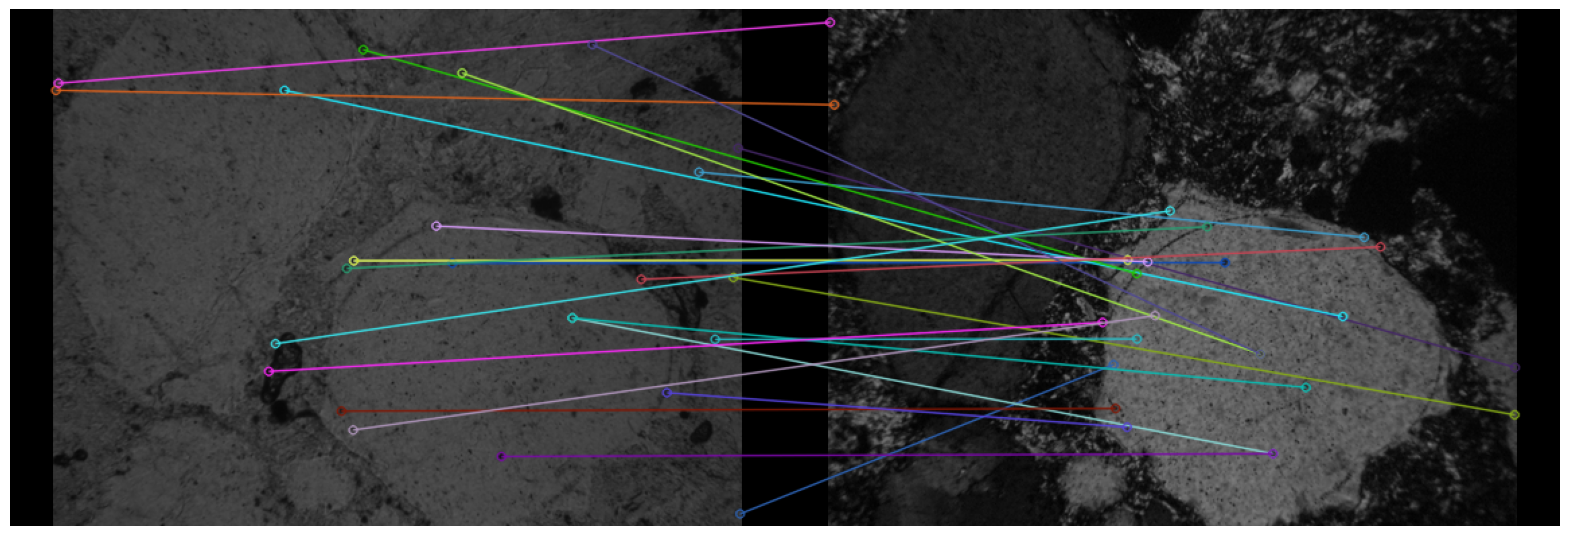

In [17]:
import cv2
import matplotlib.pyplot as plt

# 读取图像
img1 = cv2.imread(r'G:\wyj_big_project\H_\VRP-SAM-main\dataset\ROCK\PPL-\1-3-3.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(r'G:\wyj_big_project\H_\VRP-SAM-main\dataset\ROCK\XPL+\1-3-3.png', cv2.IMREAD_GRAYSCALE)

# 初始化SIFT检测器
sift = cv2.SIFT_create()

# 检测关键点和描述符
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 创建BFMatcher对象
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 匹配描述符
matches = bf.match(des1, des2)

# 按距离排序
matches = sorted(matches, key=lambda x: x.distance)

# 绘制前50个匹配
result = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    matches[:25],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# 初始化ORB检测器
# orb = cv2.ORB_create()

# # 检测关键点和计算描述符
# kp1, des1 = orb.detectAndCompute(img1, None)
# kp2, des2 = orb.detectAndCompute(img2, None)

# # 创建暴力匹配器（使用汉明距离）
# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# # 执行匹配
# matches = bf.match(des1, des2)

# # 按距离排序
# matches = sorted(matches, key=lambda x: x.distance)

# # 绘制前50个匹配
# result = cv2.drawMatches(
#     img1, kp1, 
#     img2, kp2, 
#     matches[:20], 
#     None, 
#     flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
# )

# # 使用SIFT检测器
# sift = cv2.SIFT_create()
# kp1, des1 = sift.detectAndCompute(img1, None)
# kp2, des2 = sift.detectAndCompute(img2, None)

# # FLANN参数
# FLANN_INDEX_KDTREE = 1
# index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
# search_params = dict(checks=50)  # 搜索次数

# flann = cv2.FlannBasedMatcher(index_params, search_params)

# # 执行匹配
# matches = flann.knnMatch(des1, des2, k=2)

# # 应用Lowe's比率测试
# good_matches = []
# for m, n in matches:
#     if m.distance < 0.7 * n.distance:
#         good_matches.append(m)

# # 绘制匹配结果
# result = cv2.drawMatches(
#     img1, kp1, 
#     img2, kp2, 
#     good_matches, 
#     None, 
#     flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
# )

# 使用Matplotlib显示
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


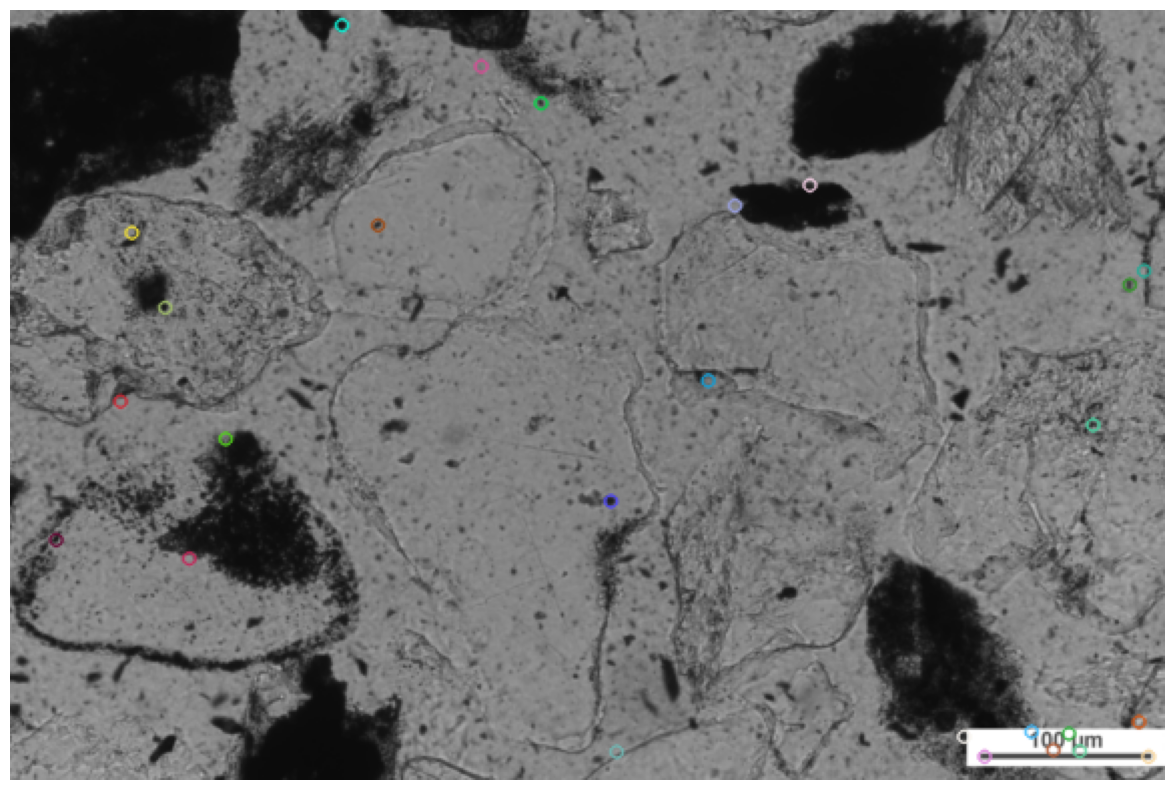

In [18]:
import cv2
import numpy as np

def nms_keypoints(keypoints, response_threshold=0.8, min_distance=10):
    """
    非极大值抑制筛选特征点
    参数：
        keypoints: 特征点列表（cv2.KeyPoint对象）
        response_threshold: 响应值筛选阈值（0~1）
        min_distance: 最小允许的像素距离
    返回：
        filtered_kps: 筛选后的特征点
    """
    # 按响应值降序排序
    kps_sorted = sorted(keypoints, key=lambda x: -x.response)
    
    filtered_kps = []
    visited = set()
    
    for i, kp in enumerate(kps_sorted):
        if i in visited:
            continue
            
        # 保留当前最大响应值特征点
        filtered_kps.append(kp)
        
        # 计算与后续点的距离
        for j in range(i+1, len(kps_sorted)):
            if j in visited:
                continue
                
            # 计算欧氏距离
            dx = kp.pt[0] - kps_sorted[j].pt[0]
            dy = kp.pt[1] - kps_sorted[j].pt[1]
            dist = np.sqrt(dx**2 + dy**2)
            
            # 标记需要抑制的点
            if dist < min_distance:
                visited.add(j)
                
    return filtered_kps


img1 = cv2.imread(r'G:\wyj_big_project\H_\VRP-SAM-main\dataset\ROCK\PPL-\a48_13.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(r'G:\wyj_big_project\H_\VRP-SAM-main\dataset\ROCK\XPL+\a48_13.png', cv2.IMREAD_GRAYSCALE)
# 假设已经通过SIFT/SURF/ORB检测到特征点
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 进行特征匹配（示例使用FLANN匹配器）
flann = cv2.FlannBasedMatcher()
matches = flann.knnMatch(des1, des2, k=2)

# 筛选优质匹配（Lowe's ratio test）
good_matches = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good_matches.append(m)

# 提取匹配的特征点坐标
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches])
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches])

# 对源图像的特征点进行NMS筛选（可同时对dst_pts做相同操作）
filtered_kps = nms_keypoints([kp1[m.queryIdx] for m in good_matches])

# 绘制结果对比
img_dense = cv2.drawKeypoints(img1, [kp1[m.queryIdx] for m in good_matches], None)
img_filtered = cv2.drawKeypoints(img1, filtered_kps, None)
# 用 matplotlib 展示
plt.figure(figsize=(20, 10))
# plt.imshow(cv2.cvtColor(img_dense, cv2.COLOR_BGR2RGB))  # OpenCV 是 BGR 格式，需要转 RGB
plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
